## 1. Dataset
----

In [2]:
# !git clone -o StrictHostKeyChecking=no https://github.com/alexeygrigorev/clothing-dataset-small.git

## 2. Configurations
----

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
!pip install tensorflow


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [5]:
import tensorflow as tf
from tensorflow import keras

2025-11-20 21:02:54.761956: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-20 21:03:12.021087: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-20 21:03:25.916076: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [6]:
from tensorflow.keras.preprocessing.image import load_img

In [7]:
path = './clothing-dataset-small/train/t-shirt/'
name = '0a85a584-cb49-4795-b2f1-7eebbf09399a.jpg'
fullname = f'{path}/{name}'

In [8]:
img = load_img(fullname, target_size=(299,299))

In [9]:
x = np.array(img)
x.shape

(299, 299, 3)

## 3. Pre-trained convulotional neural networks
----

In [10]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [11]:
model = Xception(
    weights='imagenet',
    input_shape=(299,299,3)
)

2025-11-20 21:03:32.753848: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
X = np.array([x])

In [13]:
X.shape

(1, 299, 299, 3)

In [14]:
X = preprocess_input(X)

In [15]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [16]:
decode_predictions(pred)

[[('n03595614', 'jersey', np.float32(0.9524979)),
  ('n04370456', 'sweatshirt', np.float32(0.009788689)),
  ('n04033995', 'quilt', np.float32(0.0031949775)),
  ('n03710637', 'maillot', np.float32(0.0012328895)),
  ('n03188531', 'diaper', np.float32(0.001185509))]]

## 4. Tranfer learning
----

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [19]:
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train', 
    target_size=(150,150), 
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [20]:
X, y = next(train_ds)

In [21]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation', 
    target_size=(150,150), 
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [22]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False

inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [23]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [24]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


2025-11-20 21:03:54.286779: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 42467328 exceeds 10% of free system memory.
2025-11-20 21:03:54.371874: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 42467328 exceeds 10% of free system memory.
2025-11-20 21:03:54.390371: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 84934656 exceeds 10% of free system memory.
2025-11-20 21:03:54.465821: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 84934656 exceeds 10% of free system memory.
2025-11-20 21:03:54.522296: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 84934656 exceeds 10% of free system memory.


96/96 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.6754 - loss: 1.2290 - val_accuracy: 0.7302 - val_loss: 1.2074
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step - accuracy: 0.8077 - loss: 0.6318 - val_accuracy: 0.7683 - val_loss: 1.0454
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.8667 - loss: 0.4173 - val_accuracy: 0.7977 - val_loss: 0.8840
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.9276 - loss: 0.2088 - val_accuracy: 0.7918 - val_loss: 0.8419
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.9573 - loss: 0.1248 - val_accuracy: 0.8182 - val_loss: 0.8869
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.9668 - loss: 0.1004 - val_accuracy: 0.8152 - val_loss: 0.8969
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.9651 - loss: 0.0913 - val_accuracy: 0.7918 - val_loss: 0.9352
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.9912 - loss: 0.0404 - val_accuracy: 0.8094 - val_loss: 0.

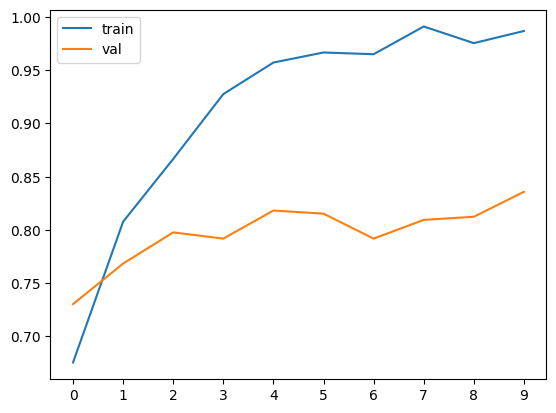

In [26]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()